# Clustering de documents

## Imports

In [175]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [176]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/pav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pav/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [247]:
data_path = "../../data/txt/"

## Clustering documents

In [248]:
# Choix de la décénnie
DECADE = '1930'

In [179]:
# Charger tous les fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [180]:
# Exemple de fichiers
files[:5]

['KB_JB838_1930-01-05_01-00006.txt',
 'KB_JB838_1930-01-09_01-00001.txt',
 'KB_JB838_1930-01-09_01-00014.txt',
 'KB_JB838_1930-01-16_01-00010.txt',
 'KB_JB838_1930-01-20_01-00002.txt']

In [181]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [182]:
# Exemple de textes
texts[0][:400]

"15 G I C 3. L ^ SQ| R V .1- . FINANCE - INDUSTRIE - COMMERCE BOURSE de BRUXELLES I Marchés d’Anvers REVUE HEBDOMADAIRE La Eourse, qui avait très peu de chance de g.tg:v»r en aciivi.é penciant cette semaine raccourcie par le congé du Nouvel- Aii, a c i cependant une attitude qui permet de bien augurer des prochaines séances. L's capitalistes semblent enfin s’être rendu compte cours leur fou: quelqu"

### Vectoriser les documents à l'aide de TF-IDF

In [183]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [184]:
# Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [185]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

/home/pav/Documents/ULB 2025-2026 TAC TP/tac/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [186]:
# Détail de la matrice
tfidf_vectors

<1000x3942 sparse matrix of type '<class 'numpy.float64'>'
	with 789606 stored elements in Compressed Sparse Row format>

In [187]:
# Imprimer le vecteur tf-IDF du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

id          0.455144
janvier     0.243864
disp        0.217844
no          0.189761
ld          0.180348
              ...   
entendre    0.000000
entendu     0.000000
entente     0.000000
entière     0.000000
♦           0.000000
Length: 3942, dtype: float64

### Tests: comparaison des vecteurs de 2 docs et calcul de leur distance

In [188]:
tfidf_array = tfidf_vectors.toarray()

In [189]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [190]:
# Vecteur du document 1
tfidf_array[1]

array([0.05956271, 0.        , 0.        , ..., 0.        , 0.        ,
       0.02573525])

In [191]:
cosine(tfidf_array[0], tfidf_array[1])

0.8606658574668415

### Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

In [224]:
# Définir un nombre initial de clusters
N_CLUSTERS = 4
# Testé avec 3,4,5,6

In [225]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [226]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`
clusters = km_model.fit_predict(tfidf_vectors)

In [227]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [228]:
pprint(dict(clustering))

{0: ['KB_JB838_1930-01-24_01-00008.txt',
     'KB_JB838_1930-04-07_01-00009.txt',
     'KB_JB838_1930-05-08_01-00008.txt',
     'KB_JB838_1930-05-28_01-00009.txt',
     'KB_JB838_1930-06-20_01-00008.txt',
     'KB_JB838_1930-08-27_01-00007.txt',
     'KB_JB838_1930-09-21_01-00011.txt',
     'KB_JB838_1930-10-14_01-00009.txt',
     'KB_JB838_1930-10-26_01-00011.txt',
     'KB_JB838_1930-11-03_01-00007.txt',
     'KB_JB838_1930-11-10_01-00007.txt',
     'KB_JB838_1930-11-21_01-00008.txt',
     'KB_JB838_1930-12-23_01-00012.txt',
     'KB_JB838_1931-01-09_01-00008.txt',
     'KB_JB838_1931-02-21_01-00008.txt',
     'KB_JB838_1931-03-10_01-00009.txt',
     'KB_JB838_1931-03-24_01-00008.txt',
     'KB_JB838_1931-04-19_01-00013.txt',
     'KB_JB838_1931-04-27_01-00009.txt',
     'KB_JB838_1931-07-01_01-00009.txt',
     'KB_JB838_1931-07-16_01-00009.txt',
     'KB_JB838_1931-08-02_01-00011.txt',
     'KB_JB838_1931-08-03_01-00007.txt',
     'KB_JB838_1931-08-05_01-00008.txt',
     'KB_JB838_1

### Visualiser les clusters

In [229]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
# Cette étape est nécessaire afin de visualiser les documents dans un espace 2D
# https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [230]:
reduced_vectors[:10]

array([[-0.20617369,  0.00851725],
       [-0.24991349,  0.06358552],
       [ 0.01281754, -0.18086667],
       [ 0.50604625,  0.39697199],
       [-0.32169693,  0.10166626],
       [ 0.20311397, -0.49186667],
       [-0.1247206 , -0.04589015],
       [-0.26433298,  0.0204334 ],
       [ 0.08005685, -0.08560318],
       [ 0.25099757, -0.07204345]])

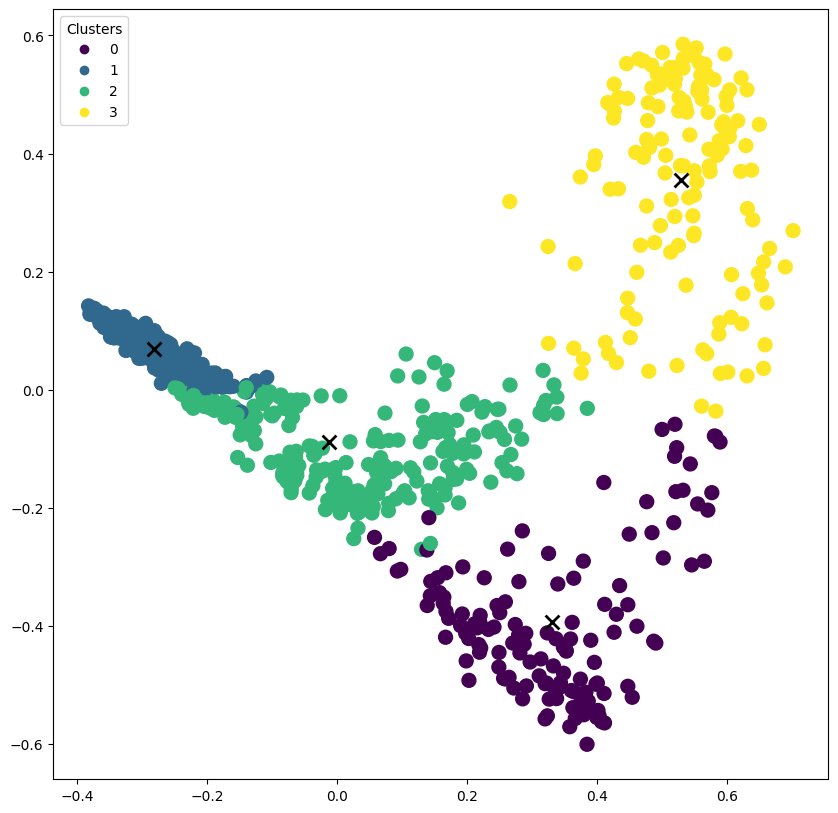

In [231]:
# Générer le plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

plt.savefig(f"./cluster_plot_{N_CLUSTERS}.png", dpi=300, bbox_inches="tight")  # save image

## Wordclouds

In [283]:
# Additional imports for wordclouds
from collections import Counter
from wordcloud import WordCloud
import nltk
import yake
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Additional stopwords (see TP2)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

add_sw = ["Brux", "ecrire","écr", "ecr","brux", "BRUX","bruxelles", "Là","Av", "AV",
       "vend", "prix", "rue", "bon", "Ch", "CH", "ST", "Chff",
       "Tél", "tél", "très", "ans", "PL", "pl", "St",
       "téléph","gar","app", "trav", "ch", "CH", "Ch","pr", "Si", "si", "SI",
       "maison", "ag", "st", "fr", "louer", "conf", "garage", "jard", "vendre", "adr", "chf", "comment",
       "villa", "bel", "av", "km", "AV", "Av", "do", "ét", "avenue", "gr", "inst", "cond",
       "jardin", "rez", "ec", "él", "tél", "moderne", "petite", "belle", "mod", "où",
       "géomètre", "chauf", "télé", "chauff", "cave", "agence", "ii", "appart", "bd", "xl", "télép", "têl", "br",
       "tr", "studio", "leç", "chaussée", "bur", "appartem", "caves", "adrcs", "faç"
       ]
sw.extend(add_sw)
sw = set(sw)

## Process for a single cluster

In [616]:
# Group the text content of all files linked to a cluster (test)
CLUSTER_ID = 4 # Adapt parameter
text_in_cluster: str
files_in_cluster = clustering[CLUSTER_ID]  # liste des fichiers dans le cluster
for file in files_in_cluster:
    with open(os.path.join(data_path,file), 'r', encoding='utf-8') as f:
        text_in_cluster = ''.join(f.read())

text_in_cluster

'6 a-. tÀ u~- * 21 DECEMBRE 1939! V. 91.021 A Bf. RAFFINERIES OU CONGO BELGE, BRUXELLES PENS. do FAM., 14-21. r. Suisse (Porto Louise) Ch. et app. & Ion .-r avec ou s. pens. C, m. 42929E "BRirxÊLLES - ^" ïiois\' Pension «Les Libellules» 17; avenue Jeanne 17, chf.. etc. 25 fr. 9G6-5E PENSION REGINA 77, r. du Commerce. Tél. 11.02.10. Belles ch. t. cf. Prix tr. mod. 43158 E MONS. Ticiil, dé», pens. seul de p.réf. et nu centre Ecr. J. S. Boite Postale 909. Bruxelles. 17390E jAppartements.Chambres offres] Porte LOUISE. Appert, lux. meub., s, b. privée. 122. ch. <;harl?rol26526F 6, r. Gachard, XL. B..app. frnnç. mod., 0 p. s. .lie b. Inst., purq. chf. Truc modéré. ,\': 4337g F P.-A-T. conf. mod Ru» Ch~ Hanssen, 10. Tél lliftl.OO 3abl. 16453 F Gr. appart. meub LUXE et (lONF\'DRI 8 .v’pl. 1. «q.‘ UêoD Jac qilet (r,F,8tronhant) XL Tét 4i^S9.02 2943 I \'F FARclsi-GlLl.ES AT.\'béVàpp\'\' 2e êt 6 I* -f-eal de.b tnstal. cave. 81/. av Clémentine, 31 rêlèp 11\'50 90 29401 E BxJR. et hnbllnt. »am. 31,

In [617]:
# Tokenisation of text
words = nltk.wordpunct_tokenize(text_in_cluster)
voc = set(words)
print(f"{len(words)} words found in text_in_cluster ({len(voc)} different word forms)")

14728 words found in text_in_cluster (4210 different word forms)


In [618]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 1 and w.isalpha() and w.lower() not in sw]
kept_string = " ".join(kept)
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

4330 words kept (2759 different word forms)


### Vocabulary Analysis

In [619]:
# Récupération des mots les plus fréquents
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('place', 30),
 ('cherche', 26),
 ('bruxelles', 21),
 ('sal', 17),
 ('bain', 14),
 ('louise', 13),
 ('francs', 13),
 ('fille', 13),
 ('référ', 13),
 ('dame', 13),
 ('jne', 13),
 ('etc', 12),
 ('dcm', 12),
 ('centre', 11),
 ('comm', 11),
 ('prés', 11),
 ('bonne', 11),
 ('eau', 10),
 ('culs', 10),
 ('lr', 10),
 ('demande', 10),
 ('présent', 10),
 ('fem', 10),
 ('lux', 9),
 ('cour', 9),
 ('midi', 9),
 ('concierge', 9),
 ('bureau', 9),
 ('ds', 9),
 ('lo', 9)]

In [620]:
# Récupération des mots qui apparaissent une fois
fdist.hapaxes()[:30]

['tà',
 'decembre',
 'bf',
 'raffineries',
 'congo',
 'fam',
 'suisse',
 'ion',
 'brirxêlles',
 'ïiois',
 'libellules',
 'jeanne',
 'regina',
 'belles',
 'ticiil',
 'postale',
 'jappartements',
 'appert',
 'privée',
 'harl',
 'gachard',
 'lie',
 'purq',
 'truc',
 'ru',
 'hanssen',
 'lliftl',
 'oo',
 'lonf',
 'dri']

In [621]:
# Identification des mots les plus longs
n = 30
sorted(voc, key=len, reverse=True)[:n]

['vaaàaamàmàààaaaaaaaaaav',
 'intkhfhovinciàlb',
 'vandenpeereboom',
 'professionnelle',
 'demonstratrices',
 'wvvvvvvvwséwvwv',
 'tnctylngrnphle',
 'internationaux',
 'vuudérstrueten',
 'ulmiuanlenalrr',
 'encyclopédique',
 'renseignements',
 'rembouroementa',
 'cinquantenaire',
 'correspondance',
 'représentation',
 'rapproohomont',
 'représentants',
 'démonstration',
 'remmalltcuses',
 'cjbjpixellofl',
 'jappartements',
 'representants',
 'repréeeutuiui',
 'circonstances',
 'lïqüïdïfarfie',
 'collaboration',
 'connaissances',
 'accordeoniste',
 'jçsêphxbaecfc']

### Extracting keywords

In [622]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [623]:
keywords = kw_extractor.extract_keywords(text_in_cluster)
print(text_in_cluster[:500])
print(keywords)

6 a-. tÀ u~- * 21 DECEMBRE 1939! V. 91.021 A Bf. RAFFINERIES OU CONGO BELGE, BRUXELLES PENS. do FAM., 14-21. r. Suisse (Porto Louise) Ch. et app. & Ion .-r avec ou s. pens. C, m. 42929E "BRirxÊLLES - ^" ïiois' Pension «Les Libellules» 17; avenue Jeanne 17, chf.. etc. 25 fr. 9G6-5E PENSION REGINA 77, r. du Commerce. Tél. 11.02.10. Belles ch. t. cf. Prix tr. mod. 43158 E MONS. Ticiil, dé», pens. seul de p.réf. et nu centre Ecr. J. S. Boite Postale 909. Bruxelles. 17390E jAppartements.Chambres offr
[('Rossel', 0.0021857408628184432), ('DEM', 0.0025131919824814028), ('RUE', 0.003612991201570626), ('Agence Rossel', 0.005200243771312589), ('Ecr', 0.00586621570225321), ('Tél', 0.007410954410547868), ('Ecrire', 0.0074691261282693695), ('place', 0.008827181020431927), ('cherche', 0.01058482637040615), ('louer', 0.011156687044063375), ('BRUXELLES', 0.011207095553599545), ('cherche place', 0.013101244316841556), ('bon', 0.015525577487531526), ('app', 0.017882603753227914), ('prix Agence Rossel', 

In [624]:
keywords_kept = kw_extractor.extract_keywords(kept_string)
print(kept_string)
print(keywords_kept)

tà decembre bf raffineries congo belge bruxelles pens fam suisse porto louise ion pens brirxêlles ïiois pension libellules jeanne etc pension regina commerce belles cf mons ticiil dé pens seul réf nu centre boite postale bruxelles jappartements chambres offres porte louise appert lux meub privée harl gachard frnnç lie purq truc modéré ru hanssen lliftl oo meub luxe lonf dri uêod jac qilet tét farclsi glll at bévàpp êt eal tnstal clémentine rêlèp bxjr hnbllnt am marronnier magn barriere gili building waterloo grandes pinces salit bain clift central usage loyer sch tez cii eomm cour uls évier lectr modér rè nia neuf louise jol bu reàu mr sérieux washington lux serre ttius cab toil tv privé slbatntél os ts pbrte namur so bonlfaee çin qüan air appartenu confort celtes facilités cham brjés méub petits aqueduc midi midi fm cuv rem nf fcron centre marché porcs ap cf ad conc superbe ap cent bain gde mnnr lard bain bnln lavabo bidet instnl eau évier cuisine foyer roi vts ad roi net splendide bu

In [625]:
# Garder les bigrammes et plus du texte du cluster choisi
kept_kw = []
for kw, score in keywords:
    words = kw.split()
    if len(words) >= 2:
        kept_kw.append(kw)
print(f"The text of the chosen cluster mentions these keywords:")
for n in kept_kw:
    print(n)

The text of the chosen cluster mentions these keywords:
Agence Rossel
cherche place
prix Agence Rossel
dem place concierge
JNE FILLE
l'AGENCE ROSSEL
Bruxelles cherche Jeune
PATISSERIE dem
BON HORLOGER Dem
dem place


In [626]:
# Garder les bigrammes et plus du texte nettoyé du cluster choisi
kept_kw = []
for kw, score in keywords_kept:
    words = kw.split()
    if len(words) >= 2:
        kept_kw.append(kw)
print(f"The text of the chosen cluster mentions these keywords:")
for n in kept_kw:
    print(n)

The text of the chosen cluster mentions these keywords:
francs reception mensualites
reception mensualites francs
mensualites francs larousse
fille sténo dactylo
rem cause doub
prêts hypothécaires rangs
salle bain culs
meublé salle bain
meub eau cour
pièces salle bain
jne fille présent
jne fille sténo
salle bain cuisine
demandes jne fille
lux meub culs
sal bain culs
comptant francs reception
cpt francs reception
fille courant bonne
appartement meublé salle
francs vis jours
sal bain confort
jeune fille sténo
café rem cause
eau cour gaz
frnnç salle bain
jeune fille courant
appartement pièces salle
lux meublé pièces
emplois demandes jne
mensualites francs bulletin
présent prés café
offres jnes serveuses
salle bain installée
lux meub salon
central eau cour
café taverne bourse
emplois offres louise
meublé salle manger
dames demande ouvrier
café taverne sérieux
salon sal bain
présent midi serveuse
cil sal bain
jeudi midi cour
salle manger chambres
beau café rem
patisserie jeune fille
jne fil

### Nuage de mots

In [627]:
# Affichage des termes les plus fréquents
frequencies = Counter(kept_string.split())
print(frequencies.most_common(10))

[('place', 30), ('cherche', 26), ('bruxelles', 21), ('sal', 17), ('bain', 14), ('louise', 13), ('francs', 13), ('fille', 13), ('référ', 13), ('dame', 13)]


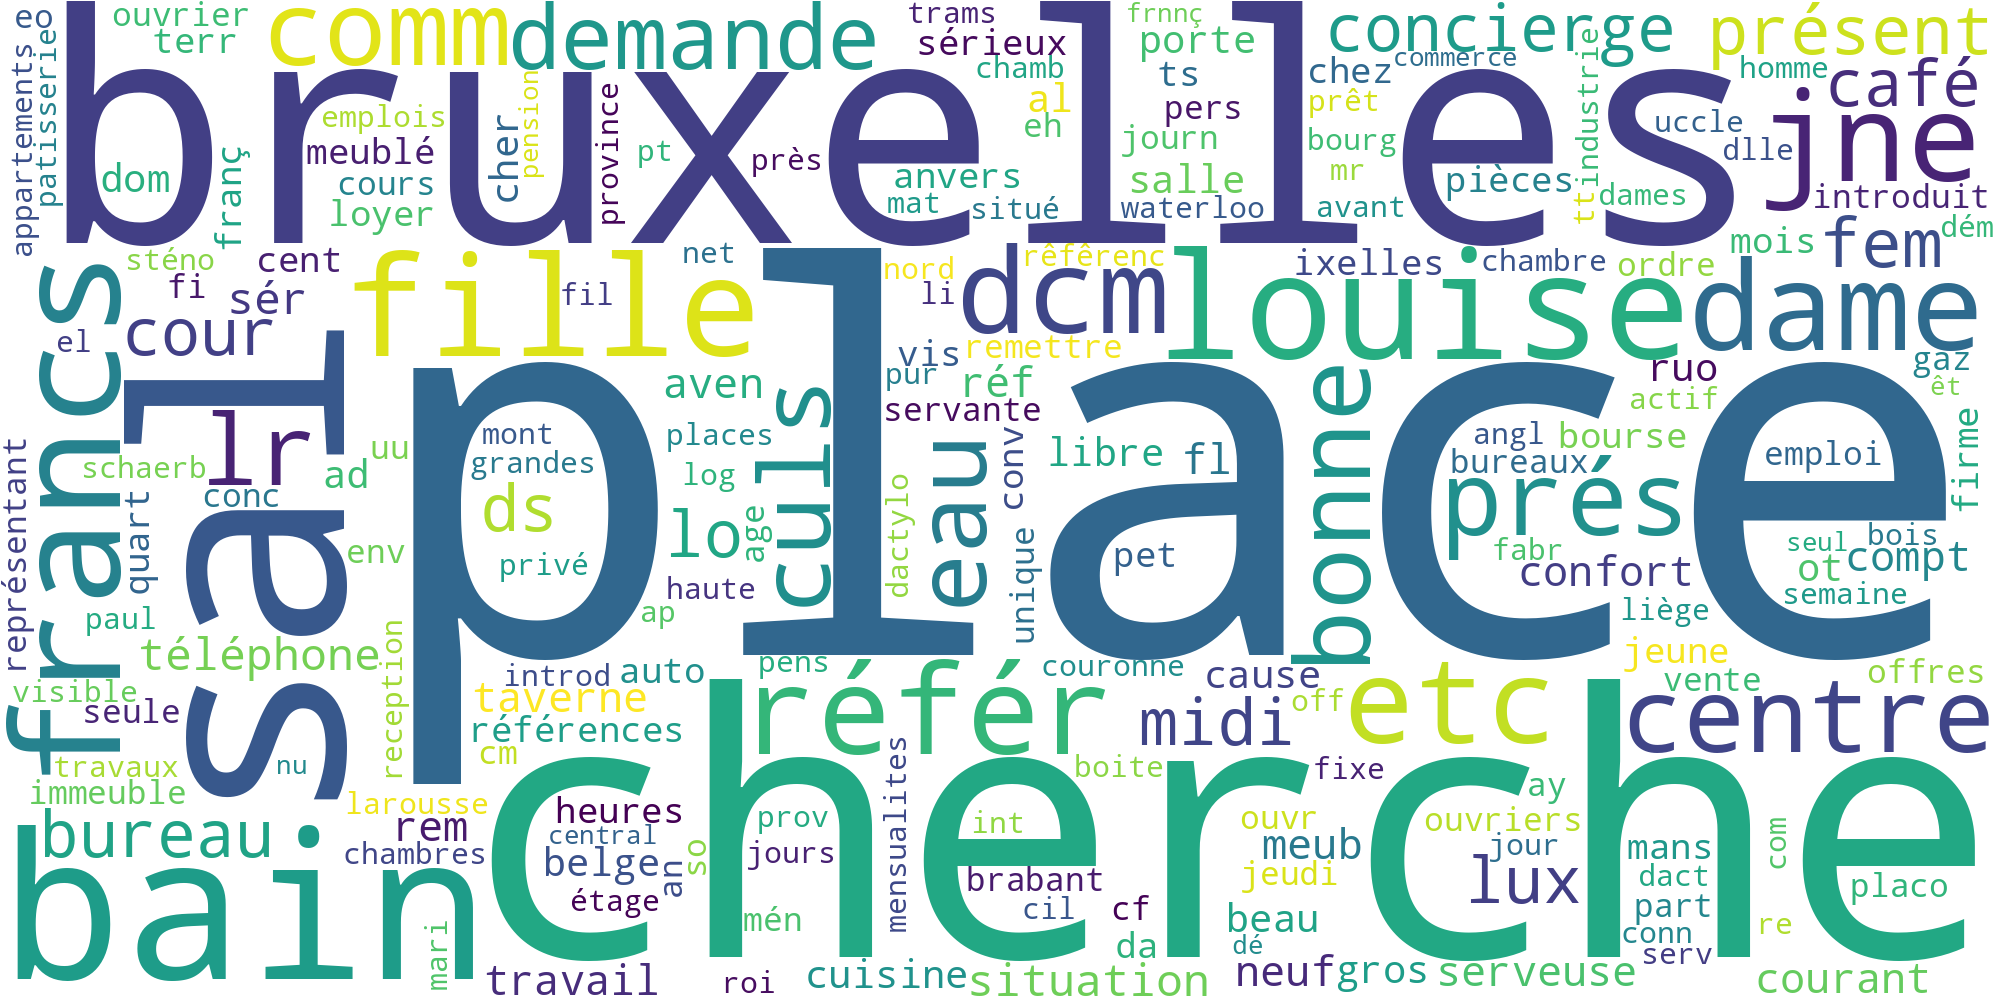

In [628]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join('./', f"{DECADE}s_cluster_{CLUSTER_ID}.png"))
Image(filename=os.path.join('./', f"{DECADE}s_cluster_{CLUSTER_ID}.png"))